In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

In [37]:
df = pd.read_csv('Classified Data', index_col=0)

In [38]:
df

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


In [39]:
scaler = StandardScaler()

In [40]:
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler()

In [41]:
df_Padron = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [42]:
df_Padron

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [43]:
df_param = pd.DataFrame(df_Padron, columns=df.columns[:-1])

In [276]:
x_train, x_test, y_train, y_test = tts(df_param, df['TARGET CLASS'], test_size=0.33, random_state=32)

In [277]:
Knn = KNeighborsClassifier(n_neighbors=30)

In [278]:
Knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=30)

In [279]:
pred = Knn.predict(x_test)

In [280]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       175
           1       0.96      0.97      0.96       155

    accuracy                           0.97       330
   macro avg       0.97      0.97      0.97       330
weighted avg       0.97      0.97      0.97       330



In [169]:
print(confusion_matrix(y_test, pred))

[[153  17]
 [  9 151]]


In [281]:
error_rate = []

for i in range(1, 100):
    x_train, x_test, y_train, y_test = tts(df_param, df['TARGET CLASS'], 
                                               test_size=0.33, random_state=i)
    Knn = KNeighborsClassifier(n_neighbors=30)
    Knn.fit(x_train, y_train)
    pred = Knn.predict(x_test)
    error_rate.append(np.mean(pred!=y_test))
    


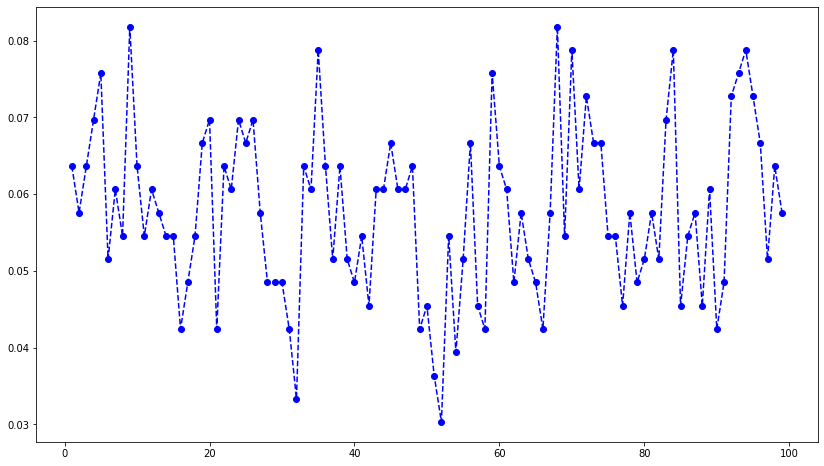

In [283]:
plt.figure(figsize=(14,8))
plt.plot(range(1,100), error_rate, color='blue', linestyle='dashed', marker='o')